In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import spacy

In [2]:
pd.set_option('max_colwidth', 400)

In [3]:
data=pd.read_csv('/kaggle/input/symptom2disease/Symptom2Disease.csv')
data.head()

,Unnamed: 0,label,text
0,0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
1,1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation."
2,2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints."
3,3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them."
4,4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."


# BaG of words

In [4]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
print(f'Spacy english stopwords size: {len(stopwords)}', end='\n\n')

Spacy english stopwords size: 326



In [5]:
%%time
data['cleaned_text'] = data['text'].apply(
    lambda x: ' '.join(
        token.lemma_.lower() for token in nlp(x) if 
        not token.is_stop 
        and not token.is_punct
        and not token.is_digit
        and not token.like_email
        and not token.like_num
        and not token.is_space
    ))

CPU times: user 13.7 s, sys: 10 ms, total: 13.7 s
Wall time: 13.7 s


In [6]:
data.sample(5)

,Unnamed: 0,label,text,cleaned_text
731,131,Migraine,"I have been experiencing acidity, indigestion, and frequent headaches, as well as blurred and distorted vision, excessive hunger, a stiff neck, depression, irritability, and visual disturbance.",experience acidity indigestion frequent headache blur distorted vision excessive hunger stiff neck depression irritability visual disturbance
296,296,Dengue,The body pain I have been feeling is extreme. I has lost my appetite and developed rashes on my arms and face. The back of my eyes pain a lot.,body pain feel extreme lose appetite develop rash arm face eye pain lot
65,65,Varicose Veins,The veins on my legs cause a lot of discomforts when I sit for long periods of time.,vein leg cause lot discomfort sit long period time
197,197,Chicken pox,"I have a high fever and red spots and rashes all over my body. I feel exhausted and have completely lost my appetite, which has made me weak and lethargic. I am really worried.",high fever red spot rashe body feel exhausted completely lose appetite weak lethargic worried
978,78,allergy,"I'm dizzy, nauseated, and shaky. I'm having trouble breathing since my throat is swollen. On occasion, throughout the night, my chest hurts and I feel sick.",dizzy nauseated shaky have trouble breathe throat swollen occasion night chest hurt feel sick


In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

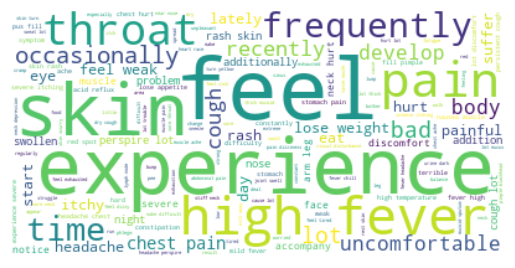

In [8]:
text = data['cleaned_text'].tolist() 
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True,
                      background_color='white').generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

The word cloud shows the most common words used in the symptoms description.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], random_state=42)

In [11]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [12]:
def return_bag(v,matrix):
    return pd.DataFrame(matrix.toarray(), columns=v.get_feature_names_out())

In [13]:
X_train_0 = return_bag(vectorizer,X_train_vectorized)
X_test_0 = return_bag(vectorizer,X_test_vectorized)
X_train_0.head()

,abdoman,abdomen,abdominal,ability,able,abound,absolutely,aburning,accomapanie,accompany,...,worry,worrying,worsen,wound,wrist,wrong,yeast,yellow,yellowish,yesterday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Taking the X set as example, I wanna draw a bar chart to visualize the top 20 common word with their corresponding frequencies.

In [32]:
sum_words = X_train_0.sum(axis=0).sort_values(ascending=False)
top_words = sum_words.head(20).to_dict()

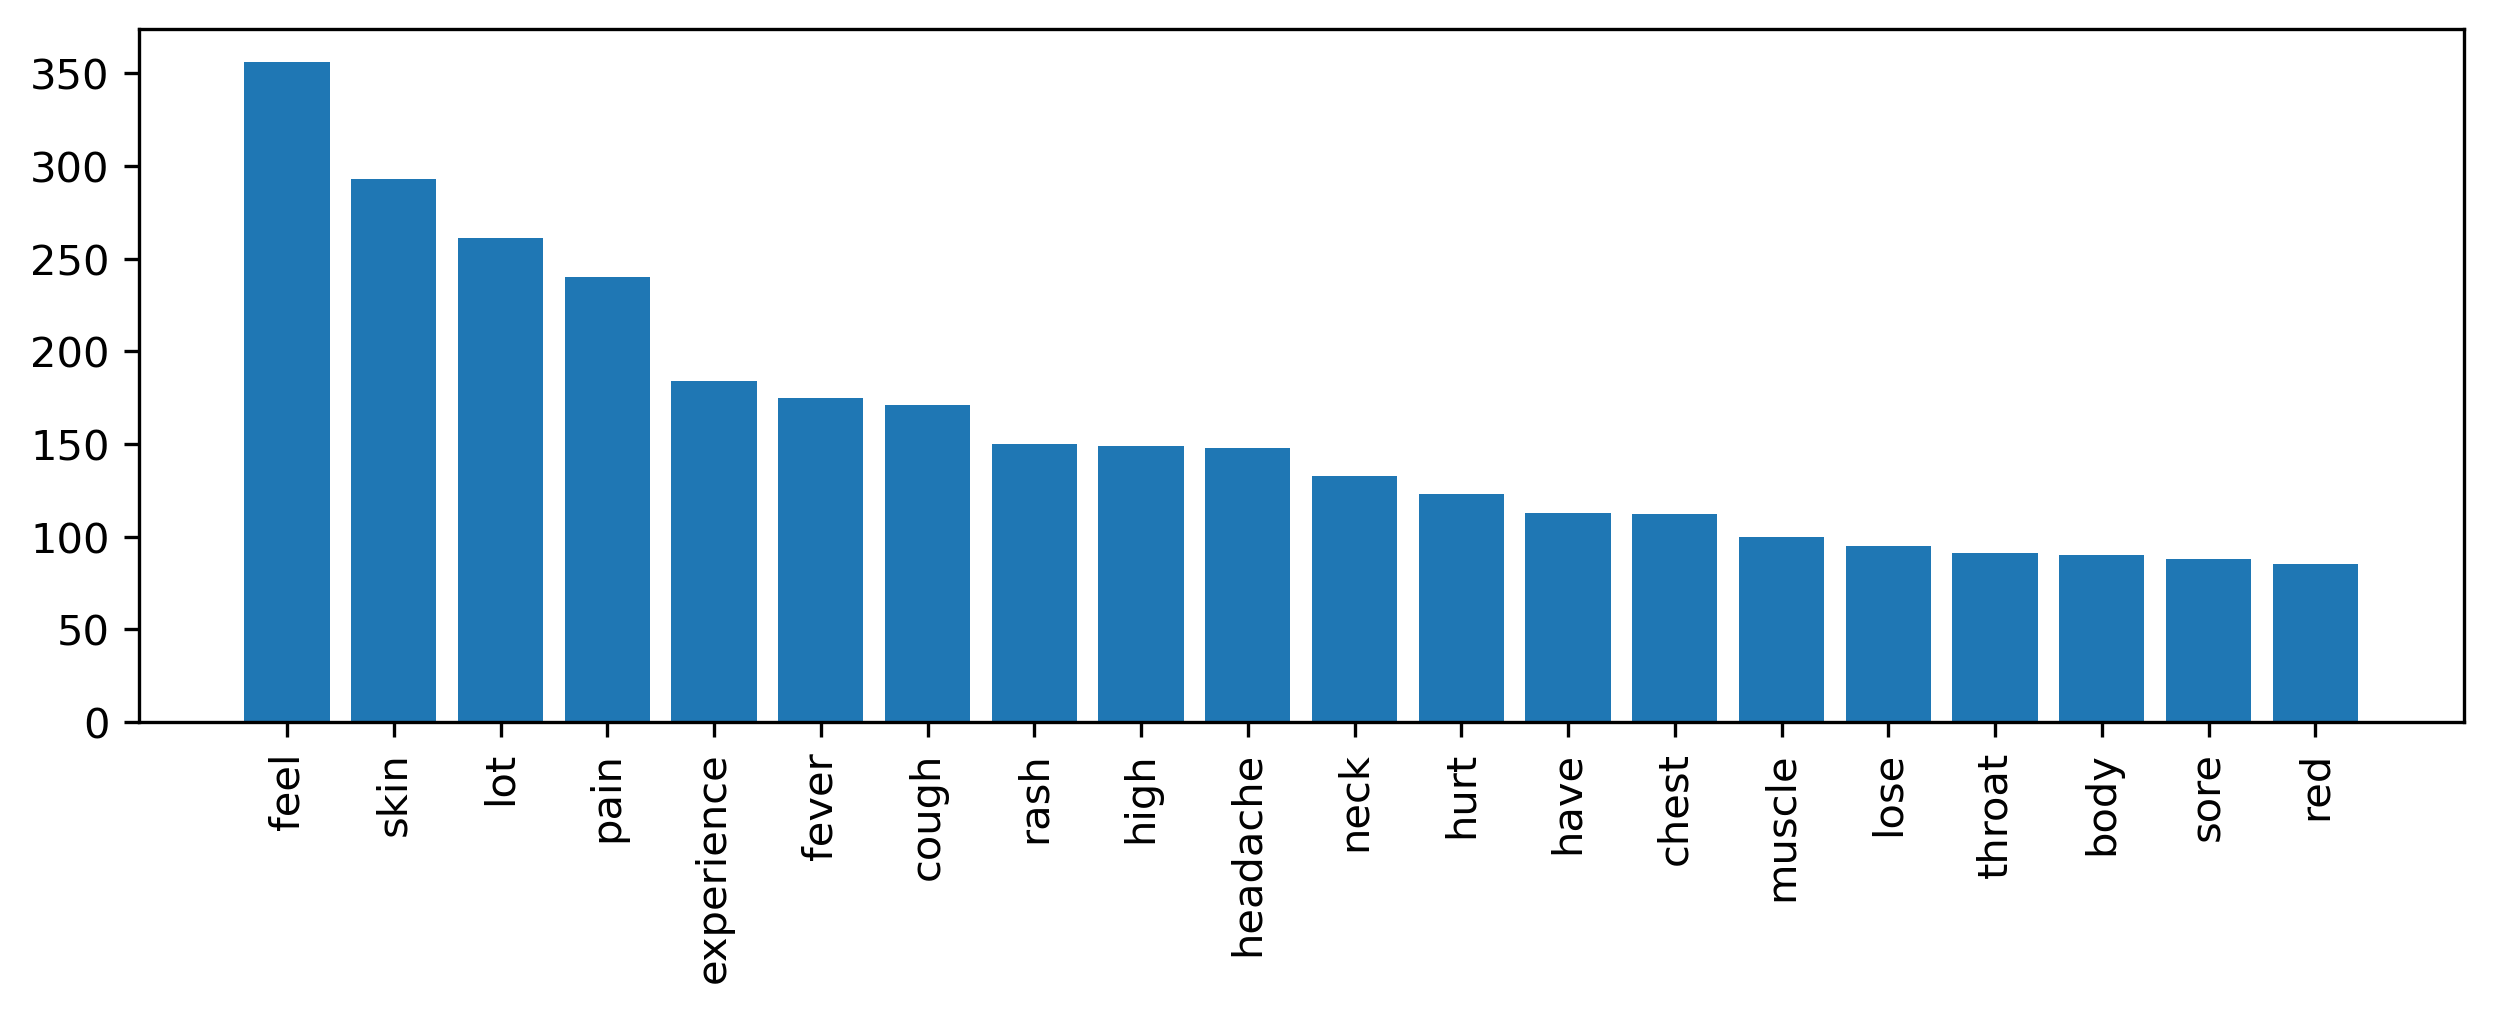

In [37]:
plt.figure(figsize=(10,3),dpi=300)
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()),rotation='vertical')
plt.show()

In [14]:
vectorizer_ = CountVectorizer(max_df=0.9, min_df=0.003)
X_train_vectorized_ = vectorizer_.fit_transform(X_train)
X_test_vectorized_ = vectorizer_.transform(X_test)

In [15]:
X_train_1 = return_bag(vectorizer_,X_train_vectorized_)
X_test_1 = return_bag(vectorizer_,X_test_vectorized_)
X_train_1.head()

,abdoman,abdomen,abdominal,ability,able,absolutely,accompany,ache,acid,acidic,...,will,woozy,work,worn,worried,worry,wound,wrong,yeast,yellow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Next, try to compare whether there's huge difference in predicting Performance between the two results, Ads the first one has 400 columns more than the second...

# Try classification with Dense

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)
y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)

In [18]:
X_train = np.array(X_train_0)
X_test = np.array(X_test_0)

In [70]:
def create_model(in_dim):
    model = Sequential()
    model.add(Dense(1024,input_dim=in_dim,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(768,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(512,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(256,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(128,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(len(data['label'].unique())))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
model = create_model(len(X_train[0]))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 1024)              78848     
                                                                 
 dropout_60 (Dropout)        (None, 1024)              0         
                                                                 
 dense_73 (Dense)            (None, 768)               787200    
                                                                 
 dropout_61 (Dropout)        (None, 768)               0         
                                                                 
 dense_74 (Dense)            (None, 512)               393728    
                                                                 
 dropout_62 (Dropout)        (None, 512)               0         
                                                                 
 dense_75 (Dense)            (None, 256)             

In [20]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),verbose=0, batch_size=64, epochs=50)
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.9567


[0.11399922519922256, 0.9566666483879089]

In [21]:
X_train_ = np.array(X_train_0)
X_test_ = np.array(X_test_0)

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train_, y_train, validation_data=(X_test_, y_test),verbose=0, batch_size=64, epochs=50)
model.evaluate(X_test_, y_test)

10/10 [==============================] - 0s 7ms/step - loss: 0.2109 - accuracy: 0.9600


[0.21088437736034393, 0.9599999785423279]

Actually, there is no huge difference on the test set. But since this is for symptom diagnose so the full set might be the best option.

# Tf-Idf

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer,  TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from scikeras.wrappers import KerasClassifier

In [85]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], random_state=42)
le = preprocessing.LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)
y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)

### TfidfVectorizer

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


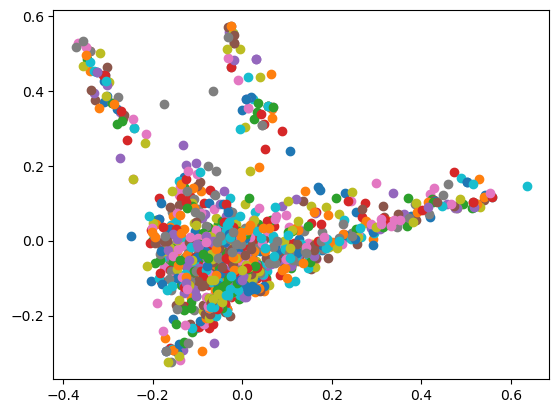

In [91]:
from sklearn.decomposition import PCA
vectorizer=TfidfVectorizer(min_df=1, stop_words='english', decode_error='ignore')
vectorized=vectorizer.fit_transform(data['cleaned_text'])
num_samples, num_features=vectorized.shape
reduced_data = PCA(n_components=2).fit_transform(vectorized.todense())
fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    pca_comp_1, pca_comp_2 = reduced_data[index]
    ax.scatter(pca_comp_1, pca_comp_2)
plt.show()

In [92]:
vectorized.shape

(1200, 1144)

In [95]:
clf = KerasClassifier(model=create_model(1075), epochs=50, verbose=0)
pipetf = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ]
).fit(X_train, y_train)
predtf = pipetf.predict(X_test)
print(classification_report(y_test, predtf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        11
           4       0.85      0.92      0.88        12
           5       0.86      0.80      0.83        15
           6       0.79      0.79      0.79        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        13
          11       0.94      1.00      0.97        15
          12       1.00      1.00      1.00        14
          13       1.00      0.91      0.95        11
          14       1.00      1.00      1.00        15
          15       0.89      0.89      0.89         9
          16       1.00      0.86      0.92        14
          17       1.00    

### IDF

In [98]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train)
print(len(vectorizer.get_feature_names()))

1075


In [111]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(X)
df_idf = pd.DataFrame(tfidf_transformer.idf_, columns=["idf_weights"]) 
df_idf = df_idf.sort_values(by=['idf_weights'],ascending=False)
df_idf.head(10)

,idf_weights
732,7.110358
272,7.110358
265,7.110358
670,7.110358
678,7.110358
262,7.110358
261,7.110358
259,7.110358
257,7.110358
256,7.110358


In [113]:
count_vector=vectorizer.transform(X_train) 
tf_idf_vector=tfidf_transformer.transform(count_vector)
text_vector=tf_idf_vector[0]
df_score = pd.DataFrame(text_vector.T.todense(), columns=["tfidf"]) 
df_score = df_score.sort_values(by=["tfidf"],ascending=False)
df_score.head(10)

,tfidf
326,0.372991
224,0.320396
1017,0.293647
1072,0.287076
1051,0.282513
616,0.270335
881,0.262105
519,0.261003
809,0.243585
559,0.235462


In [80]:
clf = KerasClassifier(model=create_model(1075), epochs=50, verbose=0)
pipett = Pipeline(
    steps=[
        ('counter', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
       ('clf',  clf)]
).fit(X_train, y_train)
predtt = pipett.predict(X_test)
print(classification_report(y_test, predtt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        11
           4       0.83      0.83      0.83        12
           5       1.00      0.93      0.97        15
           6       0.77      0.71      0.74        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        15
          12       0.93      1.00      0.97        14
          13       1.00      0.91      0.95        11
          14       1.00      1.00      1.00        15
          15       1.00      0.89      0.94         9
          16       0.92      0.79      0.85        14
          17       1.00    